In [19]:
from sklearn.linear_model import BayesianRidge, LinearRegression
import numpy as np
import cv2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

In [22]:
train_filenames =  ['Liu137.jpg', 'Liu97.jpg', 'Liu78.jpg', 'Liu14.jpg', 'Liu69.jpg', 'Liu164.jpg', 'Liu138.jpg', 'Liu167.jpg', 'Liu107.jpg', 'Liu19.jpg', 'Liu52.jpg', 'Liu48.jpg', 'Liu5.jpg', 'Liu87.jpg', 'Liu148.jpg', 'Liu60.jpg', 'Liu116.jpg', 'Liu65.jpg', 'Liu168.jpg', 'Liu71.jpg', 'Liu22.jpg', 'Liu145.jpg', 'Liu112.jpg', 'Liu108.jpg', 'Liu141.jpg', 'Liu55.jpg', 'Liu117.jpg', 'Liu125.jpg', 'Liu73.jpg', 'Liu57.jpg', 'Liu23.jpg', 'Liu99.jpg', 'Liu152.jpg', 'Liu31.png', 'Liu81.jpg', 'Liu144.png', 'Liu92.jpg', 'Liu140.jpg', 'Liu82.jpg', 'Liu58.jpg', 'Liu95.jpg', 'Liu34.jpg', 'Liu124.jpg', 'Liu80.jpg', 'Liu77.jpg', 'Liu130.jpg', 'Liu106.jpg', 'Liu170.jpg', 'Liu171.jpg', 'Liu40.jpg', 'Liu85.jpg', 'Liu66.jpg', 'Liu4.jpg', 'Liu132.jpg', 'Liu84.jpg', 'Liu115.jpg', 'Liu83.jpg', 'Liu32.png', 'Liu39.jpg', 'Liu43.jpg', 'Liu62.jpg', 'Liu28.jpg', 'Liu13.jpg', 'Liu46.jpg', 'Liu162.jpg', 'Liu122.jpg', 'Liu10.jpg', 'Liu126.jpg', 'Liu36.jpg', 'Liu26.jpg', 'Liu119.jpg', 'Liu18.jpg', 'Liu136.jpg', 'Liu79.jpg', 'Liu155.jpg', 'Liu101.jpg', 'Liu157.jpg', 'Liu29.jpg', 'Liu75.jpg', 'Liu161.jpg', 'Liu118.jpg', 'Liu111.jpg', 'Liu96.jpg', 'Liu64.jpg', 'Liu109.jpg', 'Liu143.jpg', 'Liu25.jpg', 'Liu165.jpg', 'Liu142.jpg', 'Liu12.jpg', 'Liu41.jpg', 'Liu89.jpg', 'Liu147.jpg', 'Liu128.jpg', 'Liu156.jpg', 'Liu102.jpg', 'Liu38.jpg', 'Liu146.jpg', 'Liu42.jpg', 'Liu158.jpg', 'Liu17.jpg', 'Liu133.jpg', 'Liu135.jpg', 'Liu9.jpg', 'Liu24.jpg', 'Liu59.jpg', 'Liu15.jpg', 'Liu16.jpg', 'Liu3.jpg', 'Liu93.jpg', 'Liu139.jpg', 'Liu33.jpg', 'Liu113.jpg', 'Liu134.jpg', 'Liu86.jpg', 'Liu30.jpg', 'Liu2.jpg', 'Liu120.jpg', 'Liu11.jpg', 'Liu21.jpg', 'Liu68.jpg', 'Liu166.jpg', 'Liu63.jpg', 'Liu44.jpg', 'Liu90.jpg', 'Liu76.jpg', 'Liu54.jpg', 'Liu169.jpg', 'Liu53.jpg', 'Liu70.jpg', 'Liu67.jpg', 'Liu27.jpg', 'Liu154.jpg', 'Liu94.png', 'Liu49.jpg', 'Liu151.jpg', 'Liu7.jpg', 'Liu98.jpg', 'Liu45.jpg', 'Liu150.jpg', 'Liu91.jpg']
filename_pbar = tqdm(train_filenames)
dim = (1000, 1000)
mask_density = np.zeros(dim)
for f in filename_pbar:
    filename_pbar.set_description("Processing %s" % f)
    img = cv2.imread('F:/Invisible Man/Images/Studio_Filtered/' + f, 0)
    mask = 255 - cv2.imread('F:/Invisible Man/Images/Studio_Masks/'+f, 0)
    mask.astype(np.float32)
    mask = mask / 255
    resized_mask = cv2.resize(mask, dim, interpolation = cv2.INTER_AREA)
    mask_density += resized_mask

mask_density /= np.max(mask_density)

Processing Liu91.jpg: 100%|██████████████████████████████████████████████████████████| 141/141 [00:06<00:00, 23.11it/s]


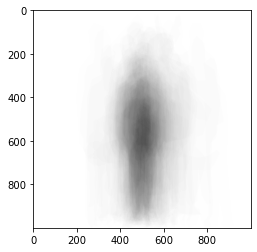

In [23]:
plt.imshow(mask_density, cmap='gray', vmin=0, vmax=1)
plt.show()

In [16]:
from scipy.stats import gaussian_kde
xx, yy = np.mgrid[np.arange(0, 1000, 1), np.linspace(0, 1000, 1)]
grid = np.vstack([xx.ravel(), yy.ravel()])
kde = gaussian_kde(mask_density)
print(kde.evaluate(grid))

LinAlgError: singular matrix